# Usando módulos Python
1. Módulos Python
    1.1 Criação de Módulos.
    1.2 Carregando Módulos.
2. Numpy
3. Scipy.
4. Matplotlib.
5. Biblioteca de imagens Python
6. Scikits
7. Módulo Python OpenCV


## Scipy

Scipy é uma biblioteca de funções, programas e ferramentas matemáticas para programação científica em Python. Ele usa numpy para sua computação interna. Scipy é uma extensa biblioteca que permite a programação de diferentes aplicações matemáticas, como integração, otimização, transformada de Fourier, processamento de sinais, estatísticas, processamento de imagens multidimensionais etc.

Carregar todos os módulos pode ser caro tanto em tempo de CPU quanto em uso de memória utilizada. Isso é particularmente importante em pacotes grandes como scipy que contêm muitos submódulos. Nesses casos, carregue apenas o submódulo específico.


## NumPy: Uma rápida introdução

A implementação de modelos computacionais eficientes passa pela escolha de estratégias apropriadas para representar e processar os dados de forma eficiente. Por este motivo, técnicas eficientes para carregar, armazenar e manipular dados na memória são de grande importância em computação científica. Levando em consideração que os dados podemos vir em uma grande quantidade de tipos e formatos o primeiro passo para transformar eles em uma estrutura que possa ser quantificada, é construir  arranjos de números. 

Por este motivo a manipulação e o armazenamento eficiente de arranjos numéricos é uma ferramenta indispensável em toda linguagem de programação que se pretenda utilizar. Neste capítulo abordaremos o módulo NumPy, um recurso muito poderoso disponível em Python para trabalhar com arranjos numéricos. 

Mais documentação sobre o módulo no site do projeto [NumPy](http://www.numpy.org)


In [1]:
import numpy as np
np.__version__

'1.24.2'

### Sobre tipos em Python

Já foi discutido antes o fato de  __Python__ ser uma linguagem dinamicamente tipada e suas implicações práticas. Uma variável em __Python__ não é apenas um bloco de memória para guardar um valor de tipo predeterminado, mas um ponteiro para um objeto utilizado para armazenar um tipo de dado. Desta forma o armazenamento de informação em variáveis acarreta uma série de informações extras que sobrecarregam o processo, quando comparado a linguagens estaticamente tipadas como C/C++. 

Esta sobrecarga fica mais evidente quando se trata de armazenar e processar um conjunto ou arranjo de dados. Vejamos, por exemplo, as listas em __Python__. Para os que já trabalharam com arrays em outras linguagens fica evidente que as listas, com toda sua flexibilidade e dinamismo, são estruturas pouco eficientes desde o ponto de vista de uso da memória. A pesar de que podem ser acessadas utilizando índice, da mesma forma que os arrays, as listas não seriam uma escolha apropriada para se tratar de problemas que envolvem estruturas como vetores e matrizes. 

### Arrays de tipo fixo

Para resolver as limitações das listas no que se refere a armazenamento de grandes volumes de informação de um tipo específico __Python__ oferece algumas alternativas. Veja por exemplo o módulo array utilizado no seguinte exemplo: 

In [2]:
import array
L = list(range(10))
x_1 = array.array('i', L)
x_1

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Entretanto o recurso mais utilizado com esta finalidade são os objetos de tipo ndarray (n-dimensional array) implementados no módulo NumPy. Este módulo disponibiliza não apenas um estrutura para armazenamento eficiente mas um conjunto de operações e funções para manipular as mesmas. Vamos fazer uma revisão dos recursos disponíveis começando por como criar um ndarray a partir de uma lista.

In [3]:
x_2 = np.array(L)
x_2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Ao contrário das listas...

In [ ]:
type(L)

... os arrays são criados utilizando um único tipo

In [4]:
x_2.dtype

dtype('int64')

Quando encontrados tipos diversos na lista utilizada para criar a array, o construtor faz um casting automático para o tipo mais abrangente.

In [5]:
L = [1, 2.0, 3, 4.0, 5, 6.0, 7]
x_3 = np.array(L)
x_3.dtype

dtype('float64')

De forma semelhante ao objeto array, o tipo pode ser explicitado no construtor

In [6]:
print("Tipo de x_3: ", x_3.dtype)
x_3 = np.array(L, 'float32')
print("Tipo de x_3: ", x_3.dtype)

Tipo de x_3:  float64
Tipo de x_3:  float32


Quando o construtor encontra uma lista de listas do mesmo tamanho, cria um ndarray multidimensional. 

In [7]:
L2D = [[[1, 2], [3, 4]],[[5, 6], [7, 8]]]
A_1 = np.array(L2D)
print(A_1.shape)
print(A_1)

(2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


### Criando um ndarray de zero

Até aqui utilizamos listas para criar arrays. O NumPy permite também criar ndarrays de diversas formas. Veja os exemplos a seguir.

In [8]:
# Criando um ndarray de 10 inteiros preenchido com zero
#x_zeros = np.zeros((2,5), dtype='int16')
x_zeros = np.zeros((1,5))
print(x_zeros)
print(x_zeros.dtype)

[[0. 0. 0. 0. 0.]]
float64


In [9]:
# Criando um ndarray preenchido com zero com a mesma forma de outro objeto
x_zeros = np.zeros_like(L2D)
print(x_zeros)
x_zeros[0,0,0] = np.pi
print(x_zeros)

[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]
[[[3 0]
  [0 0]]

 [[0 0]
  [0 0]]]


In [10]:
# Criando um ndarray de 3x3 float preenchido com um
A_ones = np.ones((3,3), dtype=float)
A_ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
# Criando um ndarray preenchido com uns, com a mesma forma de outro objeto
A_ones = np.ones_like(L)
A_ones

array([1., 1., 1., 1., 1., 1., 1.])

In [12]:
#Criando um ndarray de 3x3 float preenchido com um valor
A_full = np.full((3,3), np.pi)
A_full

array([[3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265]])

In [13]:
# Criando um ndarray preenchido com um valor, com a mesma forma de outro objeto
A_full = np.full_like(L, np.pi)
print(A_full)
A_full[0] = 1
print(A_full)

[3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265]
[1.         3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265]


In [14]:
#Criando um ndarray de 2x2 float sem inicializar
A_empty = np.empty((2,2), dtype="int")
A_empty

array([[0, 0],
       [0, 0]])

In [15]:
# Criando um ndarray sem inicializar, com a mesma forma de outro objeto
A_empty = np.empty_like(L)
A_empty

array([1.        , 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265])

In [16]:
# Criando um ndarray com um conjunto de elementos 
# comezando em 0, enquanto menor que 20 com passo 2
x_arange = np.arange(0, 1.25, 0.25)
x_arange

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
# Criando um ndarray de 5 elementos igualmente espaçados entre 0 e 1
x_linspace = np.linspace(0,1,5)
x_linspace

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [18]:
# Criando um ndarray de elementos aleatorios uniformemente
#  distribuidos entre 0 e 1
A_random = np.random.random((3,3))
A_random

array([[6.52510355e-01, 7.02179526e-01, 3.11980723e-01],
       [8.69654096e-01, 6.15342281e-04, 4.32393093e-01],
       [9.85976930e-01, 4.15744395e-01, 7.40155039e-01]])

In [19]:
# Criando um ndarray de elementos aleatorios com distribuição
#  normal, media 0 e desvio padrão 1
A_normal = np.random.normal(0, 1, (3,3))
A_normal

array([[ 0.52589613,  0.46124883,  0.55144775],
       [-0.57783212,  1.32479472, -1.45599046],
       [ 0.22791109,  1.68029406,  1.77442116]])

In [20]:
# Criando um ndarray que simule 10 lanzamentos de um dado
x_lan = np.random.randint(1,7,10)
x_lan

array([4, 4, 2, 1, 1, 5, 4, 2, 4, 5])

In [21]:
#Criando um ndarray na forma de uma matriz identidade de 3x3
I_3x3 = np.eye(3) #identity
I_3x3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Como já vimos, quando se constrói um ndarray pode-se especificar o tipo a ser utilizado. Isto pode ser feito de duas formas, sempre utilizando um dos tipos definidos na tabela seguinte.
<img align="center" style="padding-right:10px;" src="fig/Std_NumPy_Data_Types.jpeg">

In [22]:
x_zeros = np.zeros(10, dtype='int16')
#ou 
x_zeros = np.zeros(10, dtype=np.int16)

### Atributos dos ndarray

As funções utilizadas para criar os ndarray, que chamamos até aqui de construtor, permite que exploremos alguns atributos dos ndarray. Veja estes exemplos

In [23]:
#Podemos definir a semente do gerador de números aleatórios
np.random.seed(123456789)
x_1 = np.random.randint(10, size=8) # array 1D
x_2 = np.random.randint(10, size=(2,4)) # array 2D
x_3 = np.random.randint(10, size=(2,2,2)) # array 3D                 
#Podemos avaliar a dimensão, a forma e o tamanho de cada um
print("x_1 ndim: ", x_1.ndim)
print("x_1 shape: ", x_1.shape)
print("x_1 size: ", x_1.size)
print("x_2 ndim: ", x_2.ndim)
print("x_2 shape: ", x_2.shape)
print("x_2 size: ", x_2.size)
print("x_3 ndim: ", x_3.ndim)
print("x_3 shape: ", x_3.shape)
print("x_3 size: ", x_3.size)
# tamanho em bytes de cada elemento
print("x_3 itemsize: ", x_3.itemsize, "bytes")
# tamanho em bytes do array
print("x_3 nbytes: ", x_3.nbytes, "bytes")

x_1 ndim:  1
x_1 shape:  (8,)
x_1 size:  8
x_2 ndim:  2
x_2 shape:  (2, 4)
x_2 size:  8
x_3 ndim:  3
x_3 shape:  (2, 2, 2)
x_3 size:  8
x_3 itemsize:  8 bytes
x_3 nbytes:  64 bytes


## Indexação dos ndarray

Para acessar os elementos dos ndarray utilizamos a mesma estrutura de indexamento das listas. Os índices começando em 0 e indo até tamanho menos um. Podendo também utilizar índices negativos para acessar o array começando pelo final. Os array multidimensionais podem ser acessados utilizando tuplas de índices. 

Os elementos dos ndarray podem ser modificados quando acessados pelo seu índice. Deve-se levar em consideração que, ao contrário das listas, os ndarray tem um tipo fixo. 

O mecanismo de slicing utilizado em listas também pode ser utilizado com os ndarray. Um conjunto de elementos pode ser acessado utilizando x[inicio : fim : passo]. Se algum dos elementos não for especificado, seu valor padrão é: inicio = 0, fim = tamanho, passo = 1.

Veja o segunte exemplo comparando listas com ndarray

In [24]:
L = [[12, 5, 2, 4], [7, 6, 8, 8], [1, 6, 7, 7]]
print(L)
A_L = np.array(L)
print(A_L)
A_sub = A_L[1:, :2]
print(A_sub)
A_sub[0,0] = 99
print(A_L)

[[12, 5, 2, 4], [7, 6, 8, 8], [1, 6, 7, 7]]
[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]
[[7 6]
 [1 6]]
[[12  5  2  4]
 [99  6  8  8]
 [ 1  6  7  7]]


O exemplo anterior mostra que quando trabalhamos com conjuntos de dados muito grandes, podemos acessar e processar pequenos subconjuntos do mesmo sem necessidade de criarmos uma cópia do mesmo. Se estivermos interessados em trabalhar com uma cópia e não com o conjunto original de dados podemos utilizar o método copy(). Veja o exemplo.

In [25]:
A_sub_cpy = A_L[:2, :2].copy()
print(A_sub_cpy)
A_sub_cpy[0,0] = -5
print(A_sub_cpy)
print(A_L)

[[12  5]
 [99  6]]
[[-5  5]
 [99  6]]
[[12  5  2  4]
 [99  6  8  8]
 [ 1  6  7  7]]


Um outro método a ser explorado nos ndarray é aquele que permite reformular a forma do array.  Veja o que podemos fazer com um array 1D.

In [26]:
print(x_1)
x_4 = x_1.reshape(2,4)
print(x_4)
x_4[0,0] = 0
print(x_1)
x_5 = x_1.reshape(2,2,2)
print(x_5)

[8 2 9 7 4 3 4 0]
[[8 2 9 7]
 [4 3 4 0]]
[0 2 9 7 4 3 4 0]
[[[0 2]
  [9 7]]

 [[4 3]
  [4 0]]]


### Calculando com arrays na NumPy

Como já foi discutido antes, a NumPy é tão utilizada não apenas pelas características dos objetos de tipo ndarray, nela implementados. O conjunto de operações e funções para trabalhar com os ndarray são um importante diferencial. 

Operações com arrays envolvem, na maior parte das linguagens a utilização de laços ou estruturas de repetição para percorrer os elementos do mesmo. A implementação de operações vetoriais, disponíveis para o processamento de ndarrays na NumPy, faz a diferença na hora de processar estruturas de grande porte. Vejamos a seguinte exemplo para entender melhor a questão.

In [27]:
def calc_reciproco(valores):
    saída = np.empty(len(valores))
    for i in range(len(valores)):
        saída[i] = 1.0 / valores[i]
    return saída

valores = np.random.randint(1,10,size=5)
print(valores)
print(calc_reciproco(valores))

[4 9 4 1 7]
[0.25       0.11111111 0.25       1.         0.14285714]


In [28]:
big_array = np.random.randint(1,100,1000000)
%timeit calc_reciproco(big_array)

1.44 s ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Aqui utilizamos uma das funções especiais disponíveis no IPython, conhecidas como funções mágicas. Estas funções são ferramentas adicionais que podem ser de grande utilidade em diferentes contextos. Neste caso utilizamos a função %timeit que, de forma automática, determina o tempo de execução de uma única linha de código. A grande vantagem de utilizar esta função está no fato de ela realizar múltiplas execuções do código para devolver um resultado consistente. 

* __Trabalho para casa__: Descobrir e documentar outras funções mágicas disponíveis.

Para uma grande quantidade de operações, NumPy disponibiliza uma interface apropriada que permite introduzir operações vetoriais. Compare o resultado anterior com o do exemplo a seguir. 

In [29]:
%timeit (1.0/big_array)

607 µs ± 5.87 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As operações vetoriais são implementadas em NumPy através das chamadas ufuncs. As ufuncs são eficientes e flexíveis permitindo realizar, de forma rápida, operações entre escalares e arrays, assim como operações entre arrays. Realizar os cálculos utilizando ufuncs é sempre mais eficiente a implementação do mesmo cálculo utilizando estruturas de repetição. Veja os operadores aritméticos implementados em NumPy através de ufuncs na tabela a seguir.
<img align="center" style="padding-right:10px;" src="fig/Arit_Operat_NumPy.jpeg">

Veja alguns exemplos

In [30]:
# Dado o ndarray x
x = np.random.random(size=10)
print('x = ', x)
# o ndarray y 
y = np.full_like(x, 2.0)
print('y = ', y)
# e o escalar a
a = 3.0
print('a = ', a)
# Podemos somar um escalar a um ndarray
z = x + a
print("x + a = ", z)
# Podemos somar dois ndarray
z = x + y
print("x + y = ", z)


x =  [0.25123491 0.4912749  0.19497733 0.43697579 0.46192009 0.39471823
 0.45092229 0.85282167 0.51299253 0.73618562]
y =  [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
a =  3.0
x + a =  [3.25123491 3.4912749  3.19497733 3.43697579 3.46192009 3.39471823
 3.45092229 3.85282167 3.51299253 3.73618562]
x + y =  [2.25123491 2.4912749  2.19497733 2.43697579 2.46192009 2.39471823
 2.45092229 2.85282167 2.51299253 2.73618562]


In [31]:
# A função abs, que retorna o valor absoluto também pode ser utilizada
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
print("x = ", x)
print("abs(x) = ", abs(x))
# Podemos utilizar a ufunc correspondente absolute ou abs
print("abs(x) = ", np.absolute(x))
print("abs(x) = ", np.abs(x))


x =  [-2. -1.  0.  1.  2.]
abs(x) =  [2. 1. 0. 1. 2.]
abs(x) =  [2. 1. 0. 1. 2.]
abs(x) =  [2. 1. 0. 1. 2.]


In [32]:
# Estão disponíveis funções trigonométricas
alpha = np.linspace(0, np.pi, 3)
print("alpha      = ", alpha)
print("sin(alpha) = ", np.sin(alpha))
print("cos(alpha) = ", np.cos(alpha))
print("tan(alpha) = ", np.tan(alpha))
# As funções trigonométricas inversas també estão disponíveis
print("arcsin(sin(alpha)) = ", np.arcsin(np.sin(alpha)))
print("arccos(cos(alpha)) = ", np.arccos(np.cos(alpha)))
print("arctan(tan(alpha)) = ", np.arctan(np.tan(alpha)))

sinx = np.sin(alpha)
print(sinx.dtype)

alpha      =  [0.         1.57079633 3.14159265]
sin(alpha) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(alpha) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(alpha) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
arcsin(sin(alpha)) =  [0.00000000e+00 1.57079633e+00 1.22464680e-16]
arccos(cos(alpha)) =  [0.         1.57079633 3.14159265]
arctan(tan(alpha)) =  [ 0.00000000e+00  1.57079633e+00 -1.22464680e-16]
float64


In [33]:
# Funções exponenciais e logarítmicas
x = np.array([1, 2, 3])
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))
x = np.array([1, 2, 4, 10])
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1 2 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]
x = [ 1  2  4 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Um exercício

Vamos trabalhar então um exemplo simples baseado no algoritmo geral de multiplicação de matrizes.

In [34]:
# Dada uma matriz A de m linhas e l colunas
m = 256
l = 128
#A = np.random.random((m,l))
A = np.ones((m,l))
# Uma matriz B de l linhas e n colunas
n = 256
#B = np.random.random((l,n))
B= np.ones((l,n))
# Uma matriz C de m linhas e n colunas
C = np.ones((m,n))
# E os escalares alpha e beta
#alpha = 0.5
alpha = 1.0
#beta = 1.5
beta = 1.0
#print(A)
#print(B)
#print(C)

Está definida a operação GEMM que implementa a seguinte operação

$C = \alpha AB + \beta C$ 

De forma que
$C[i,j] = \alpha \sum_{k=0}^{k<l} {A[i,k] B[k,j]} + \beta C[i,j]$

Vamos primeiramente fazer uma implementação baseada exclusivamente no uso de estruturas de repetição

In [35]:
def gemm_loops(alpha, A, B, beta, C):
    ma, la = A.shape
    lb, nb = B.shape
    mc, nc = C.shape
    if (ma != mc) or (la != lb) or (nb != nc):
        return C
    
    C_ = np.zeros_like(C)
    for i in range(mc):
        for j in range(nc):
            val = 0.0
            for k in range(la):
                val += A[i,k]*B[k,j]
            C_[i,j] = alpha*val + beta*C[i,j]
    
    return C_

%timeit Z = gemm_loops(alpha, A, B, beta, C)
#C = gemm_loops(alpha, A, B, beta, C)
#C

2.48 s ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
def gemm_loop(alpha, A, B, beta, C):
    ma, la = A.shape
    lb, nb = B.shape
    mc, nc = C.shape
    if (ma != mc) or (la != lb) or (nb != nc):
        return C
    
    C_ = beta * C
    for i in range(mc):
        for j in range(nc):
            val = np.sum(A[i,:] * B[:,j].T)
            C_[i,j] += alpha*val
    
    return C_

%timeit Z = gemm_loop(alpha, A, B, beta, C)
#C_ = gemm_loop(alpha, A, B, beta, C)
#C_

303 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Visualização com Matplotlib ###



Matplotlib é uma biblioteca de plotagem 2D/3D para Python. Ele foi projetado para usar o tipo de dados numpy. Ele pode ser usado para gerar gráficos dentro de um programa Python.

In [37]:
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget

Usaremos a diretiva `plt.style` para escolher estilos estéticos apropriados para nossas figuras. Aqui vamos definir o estilo `classic`, o que garante que os gráficos que criamos usem o estilo clássico do `Matplotlib`:

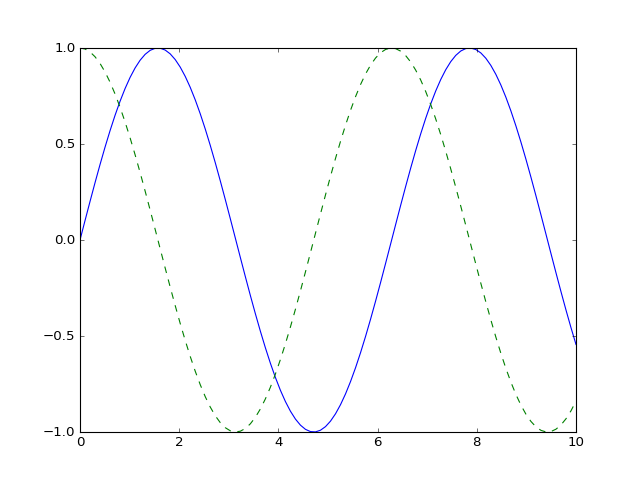

In [38]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### Salvando Figuras em Arquivo ####

In [39]:
fig.savefig("my_figure.png")

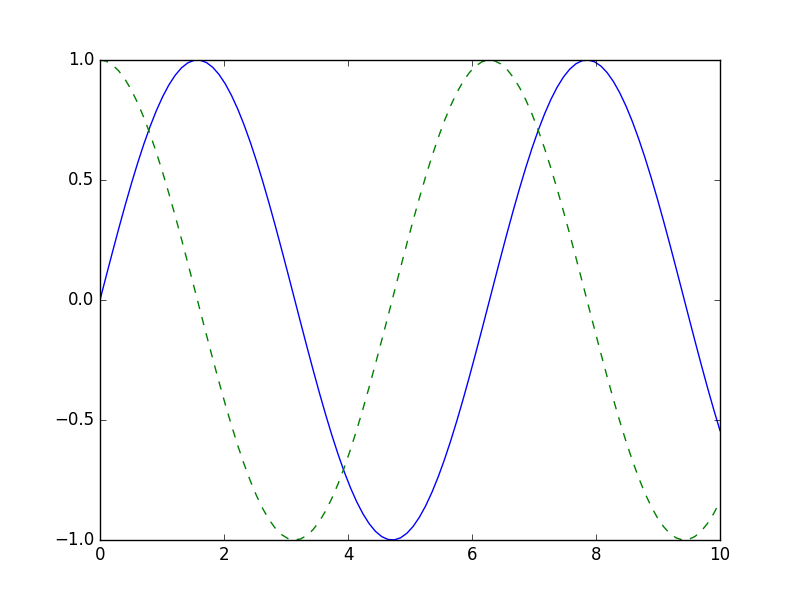

In [40]:
from IPython.display import Image
Image('my_figure.png')

In [41]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

#### MATLAB-style interface ####

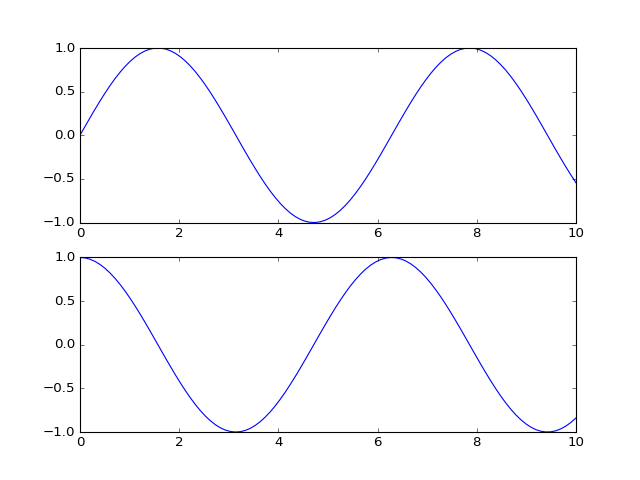

In [42]:
plt.figure()

# create the first of two panels and set current axis
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2,1,2)
plt.plot(x, np.cos(x));

É importante observar que essa interface mantém o controle da figura e dos eixos “atuais”, onde todos os comandos `plt` são aplicados. Você pode obter uma referência a eles usando as rotinas `plt.gcf()` (obter valor atual) e `plt.gca()` (obter eixos atuais).

#### Object-oriented interface ####

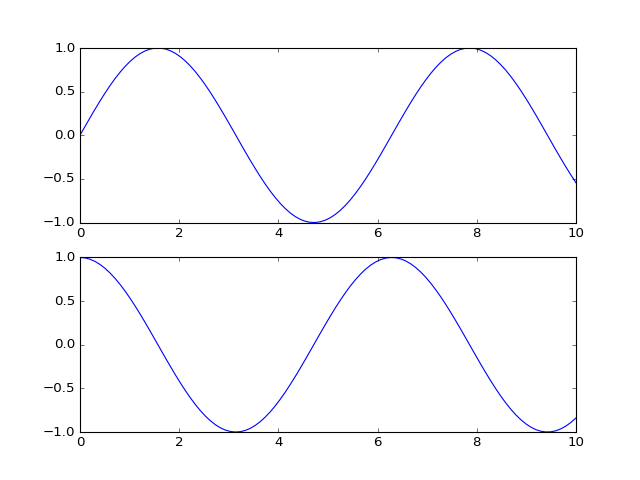

In [43]:
# First create a grid of ployts
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropiate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

#### Simple Line Plots ####

In [44]:
plt.style.use('seaborn-v0_8-whitegrid')

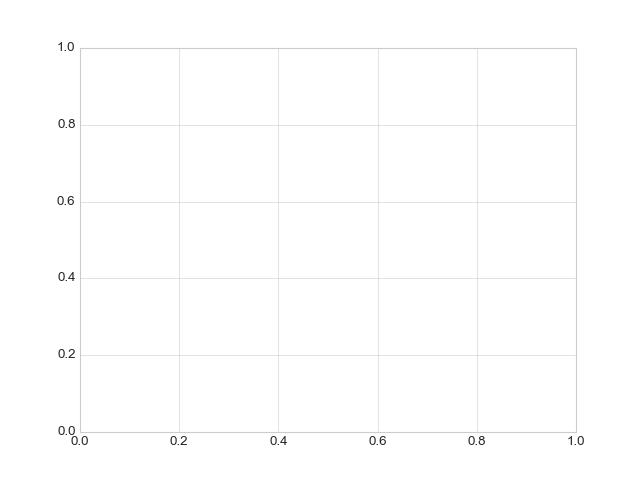

In [45]:
fig = plt.figure()
ax = plt.axes()

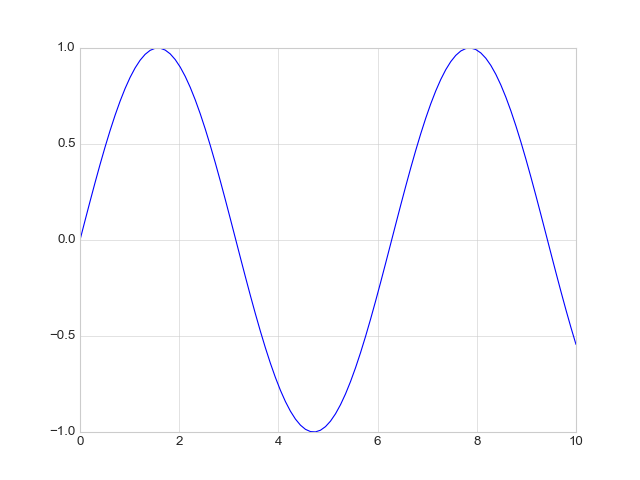

In [46]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x));

#### Adjusting the Plot: Line Colors and Styles ####

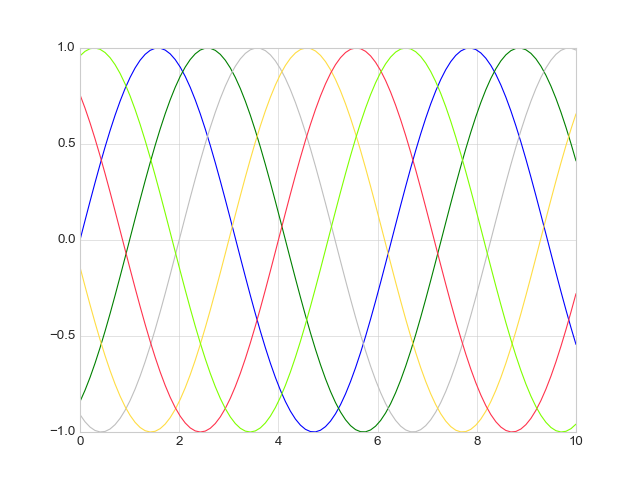

In [47]:
plt.figure()
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

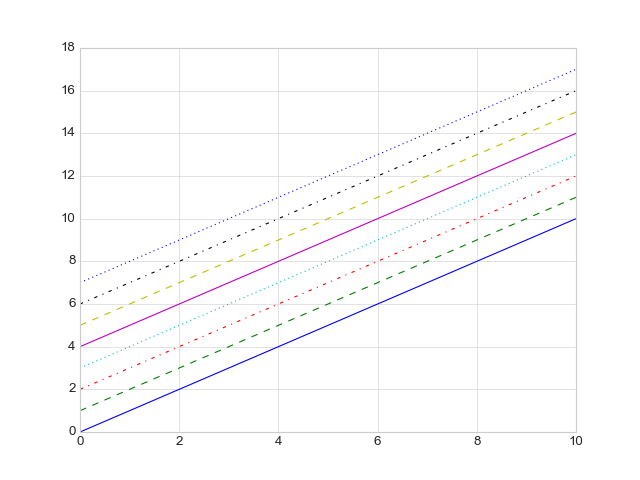

In [48]:
plt.figure()
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

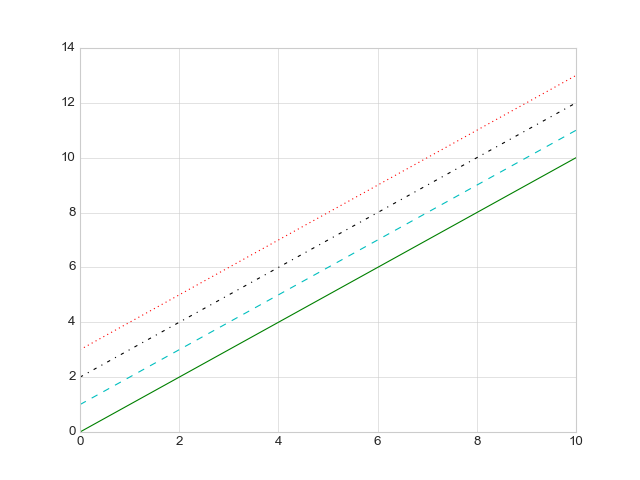

In [49]:
plt.figure()
plt.plot(x, x + 0, '-g') # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

#### Adjusting the Plot: Axes Limits ####

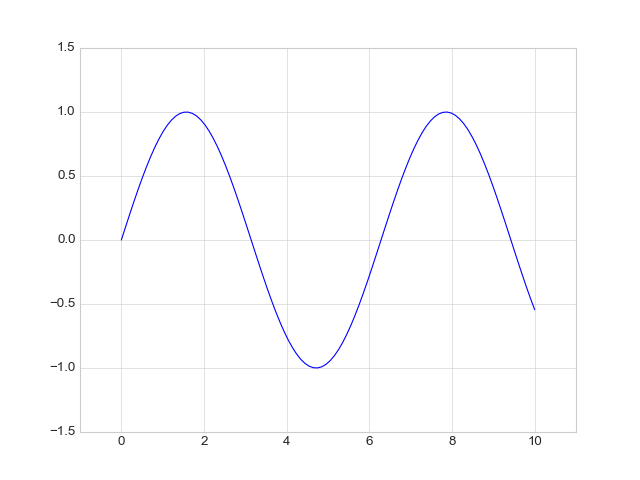

In [50]:
plt.figure()
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

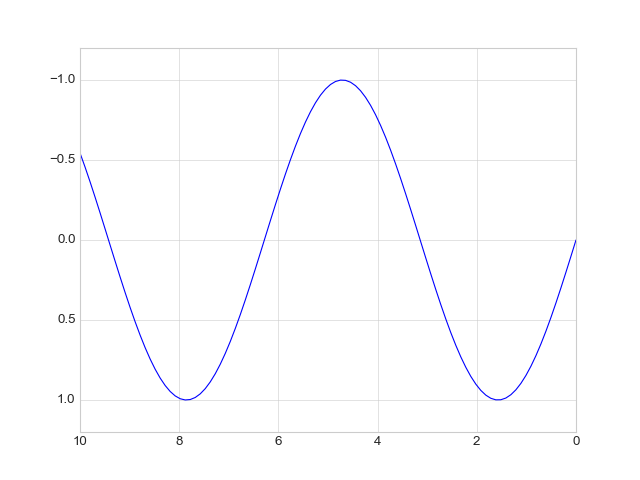

In [51]:
#  axis to be displayed in reverse
plt.figure()
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

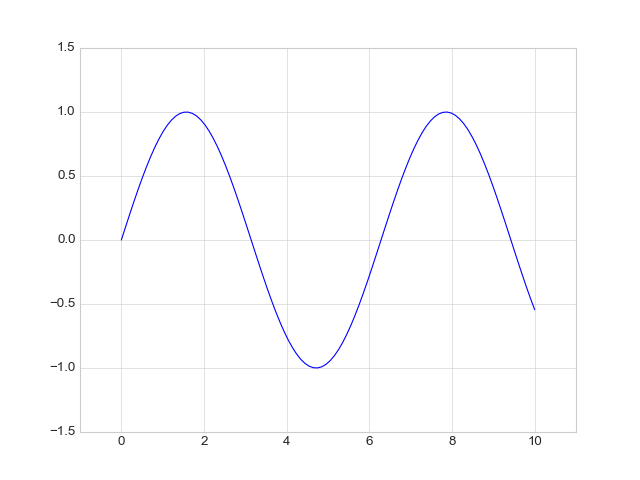

In [52]:
plt.figure()
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

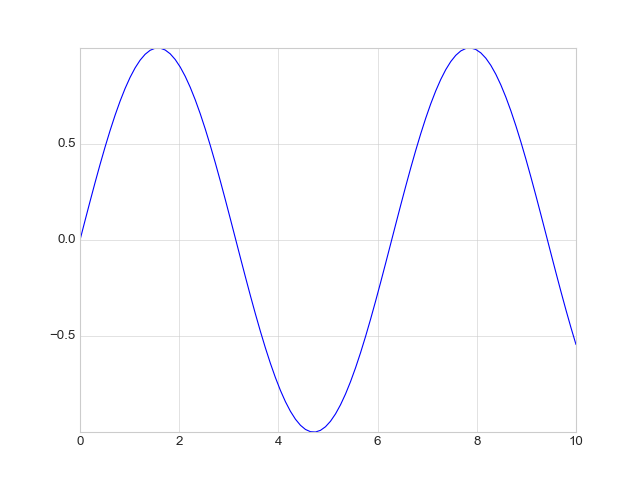

In [53]:
plt.figure()
plt.plot(x, np.sin(x))
plt.axis('tight');

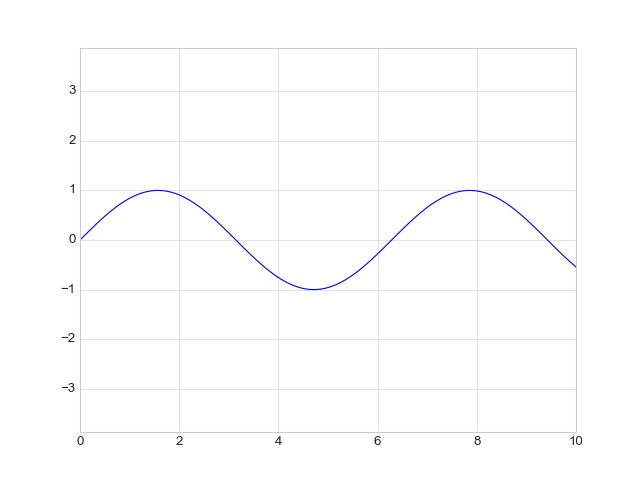

In [54]:
#  ensuring an equal aspect ratio (one unit in x is equal to one unit in y)
plt.figure()
plt.plot(x, np.sin(x))
plt.axis('equal');

#### Labeling Plots ####

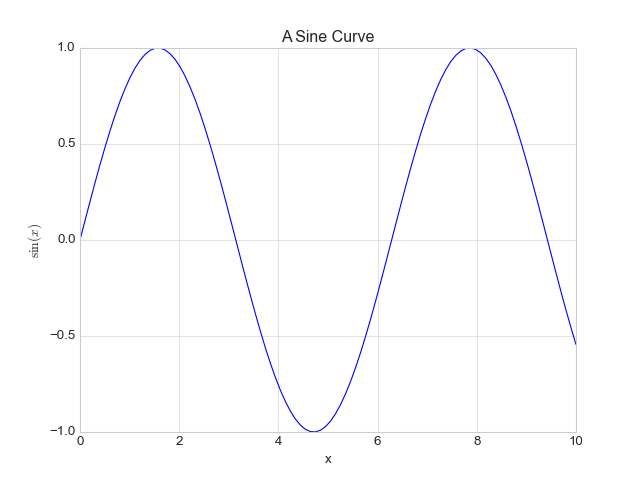

In [55]:
plt.figure()
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("$\sin(x)$");

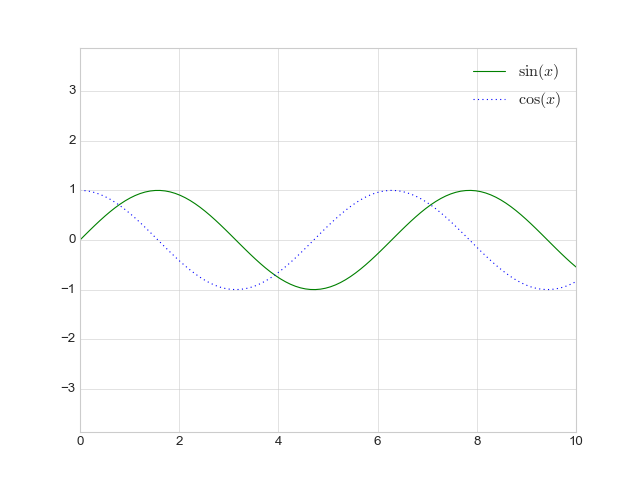

In [56]:
plt.figure()
plt.plot(x, np.sin(x), '-g', label='$\sin(x)$')
plt.plot(x, np.cos(x), ':b', label='$\cos(x)$')
plt.axis('equal')
plt.legend();

In [ ]:
plt.legend?

Embora a maioria das funções `plt` sejam traduzidas diretamente para métodos `ax` (como `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()` etc.), esse não é o caso de todos os comandos. Em particular, as funções para definir limites, rótulos e títulos foram ligeiramente modificadas. Para fazer a transição entre funções de estilo MATLAB e métodos orientados a objetos, faça as seguintes alterações:
* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

Na interface orientada a objetos para plotagem, em vez de chamar essas funções individualmente, geralmente é mais conveniente usar o método `ax.set()` para definir todas essas propriedades de uma só vez:

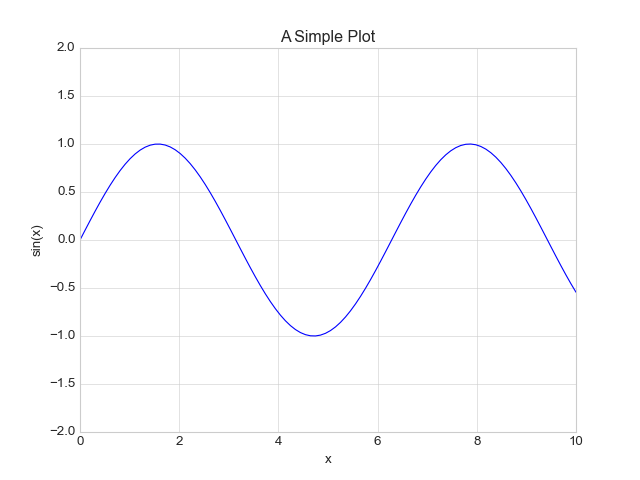

In [57]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot');

#### Simple Scatter Plots ####

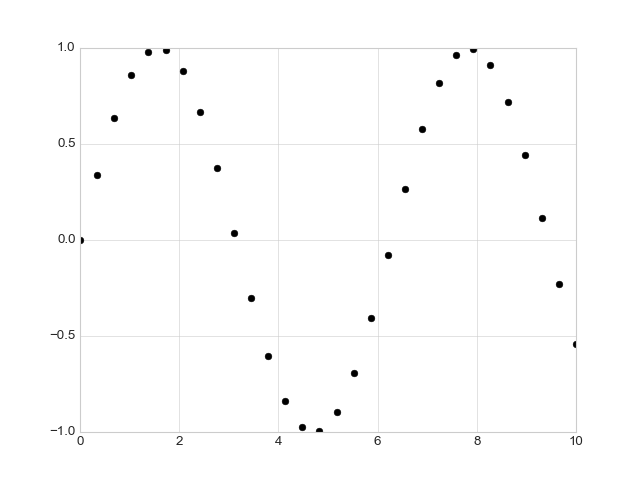

In [58]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.figure()
plt.plot(x, y, 'o', color='black');

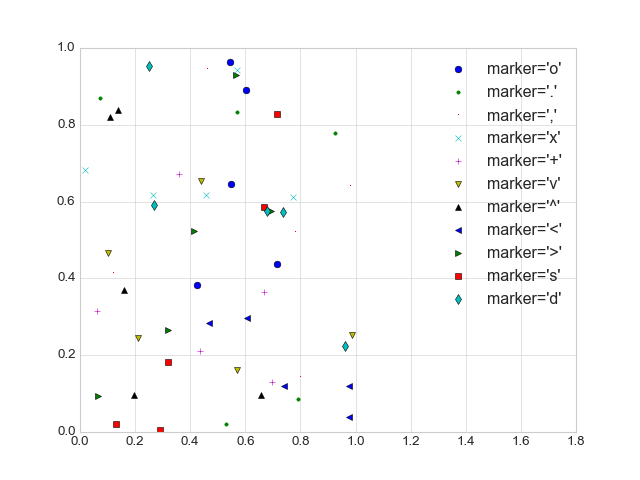

In [59]:
rng = np.random.RandomState(0)
plt.figure()
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

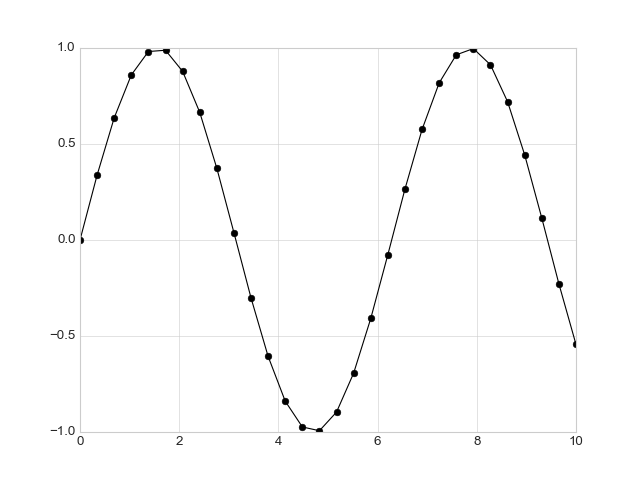

In [60]:
plt.figure()
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

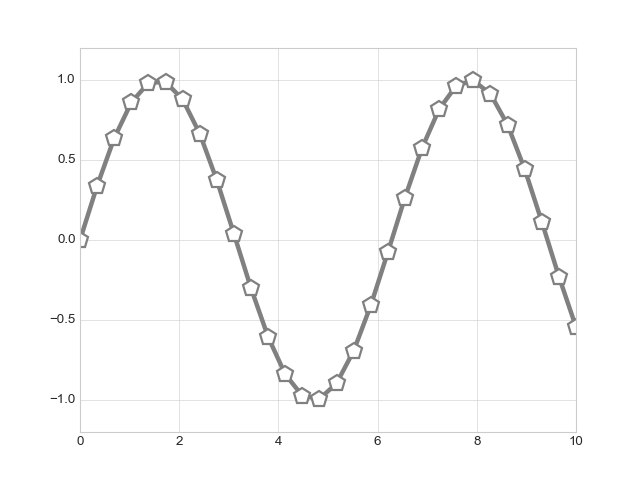

In [61]:
plt.figure()
plt.plot(x, y, '-p', color='gray', markersize=15, linewidth=4, markerfacecolor='white',
    markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

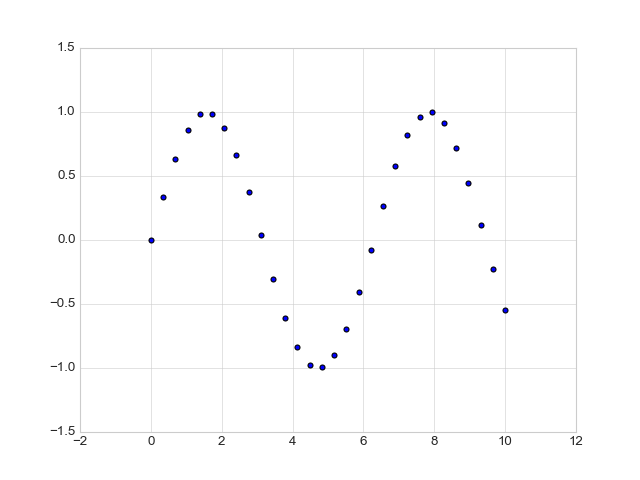

In [64]:
fig = plt.figure()
plt.scatter(x, y, marker='o');

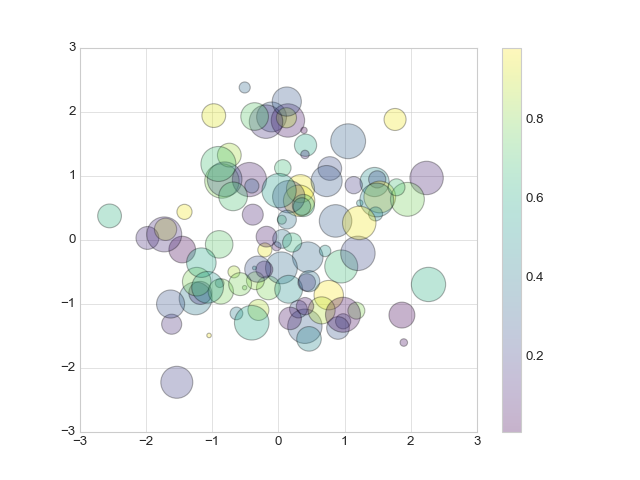

In [65]:
fig = plt.figure()
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

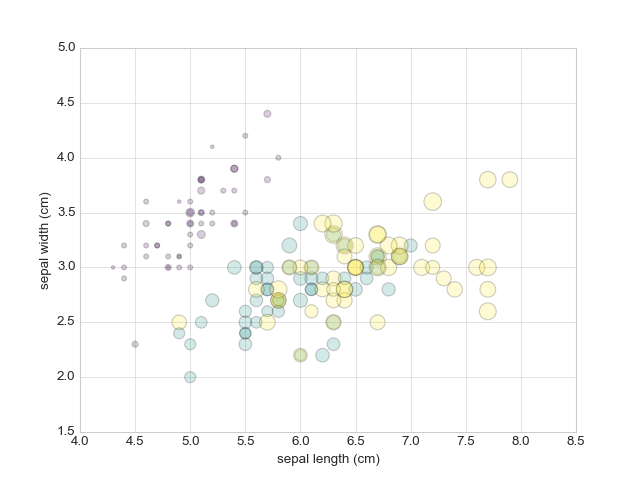

In [66]:
fig = plt.figure()
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Podemos ver que esse gráfico de dispersão nos deu a capacidade de explorar simultaneamente quatro dimensões diferentes dos dados: a localização (x, y) de cada ponto corresponde ao comprimento e largura da sépala, o tamanho do ponto está relacionado à largura pétala, e a cor está relacionada com a espécie particular de flor. Gráficos de dispersão multicoloridos e multifuncionais como este podem ser úteis tanto para exploração quanto para apresentação de dados.

#### Visualizing Errors ####

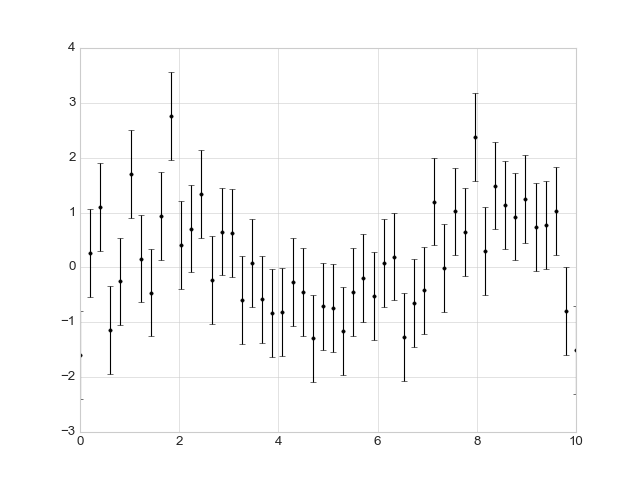

In [67]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
fig = plt.figure()
plt.errorbar(x, y, yerr=dy, fmt='.k');

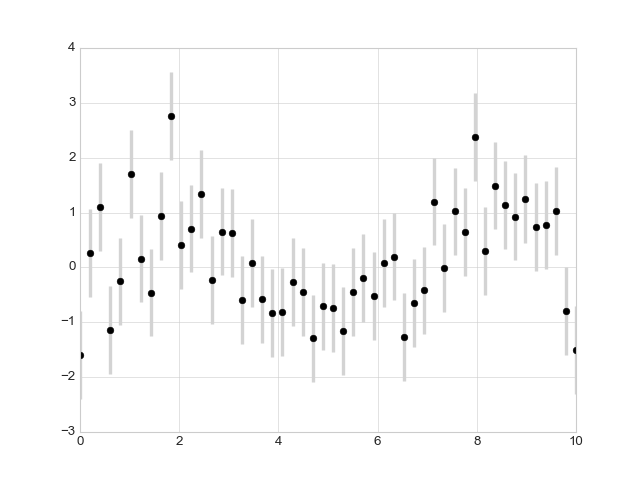

In [68]:
fig = plt.figure()
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

#### Density and Contour Plots ####

In [69]:
plt.style.use('seaborn-v0_8-white')

##### Visualizing a Three-Dimensional Function #####

In [70]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [71]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

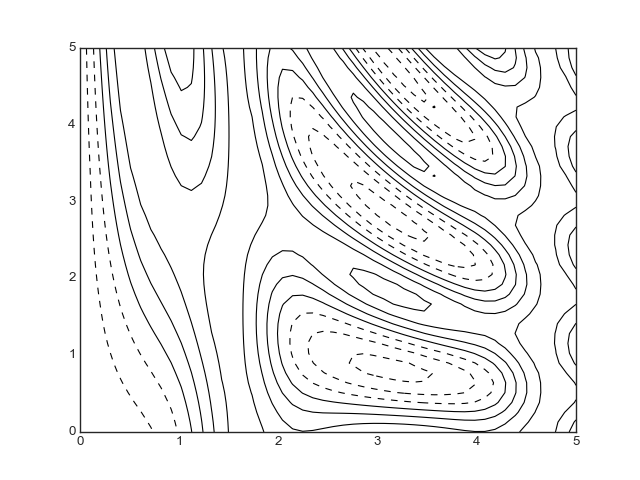

In [74]:
fig = plt.figure()
plt.contour(X, Y, Z, colors='black');

Observe que, por padrão, quando uma única cor é usada, os valores negativos são representados por linhas tracejadas e os valores positivos por linhas sólidas. Como alternativa, você pode codificar as linhas com cores especificando um mapa de cores com o argumento cmap. Aqui, também especificaremos que queremos que mais linhas sejam desenhadas - 20 intervalos igualmente espaçados dentro do intervalo de dados

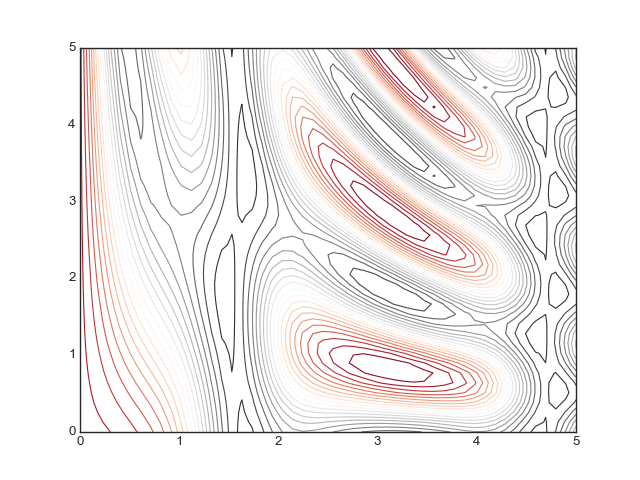

In [75]:
fig = plt.figure()
plt.contour(X, Y, Z, 20, cmap='RdGy');

Aqui escolhemos o mapa de cores RdGy (abreviação de Red-Gray), que é uma boa escolha para dados centralizados. O Matplotlib tem uma ampla gama de mapas de cores disponíveis, pela qual você pode navegar facilmente no IPython fazendo um preenchimento de tabulação no módulo plt.cm

In [ ]:
plt.cm

Nosso plot parece melhor, mas os espaços entre as linhas podem ser um pouco perturbadores. Podemos mudar isso mudando para um gráfico de contorno preenchido usando a função `plt.contourf()` (observe o f no final), que usa basicamente a mesma sintaxe de `plt.contour()`.

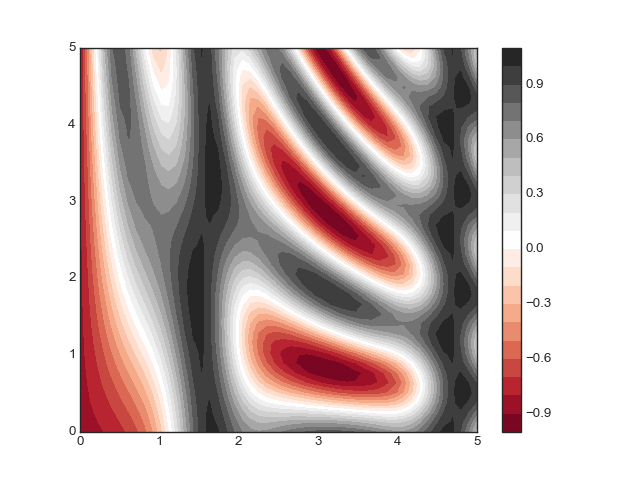

In [76]:
fig = plt.figure()
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

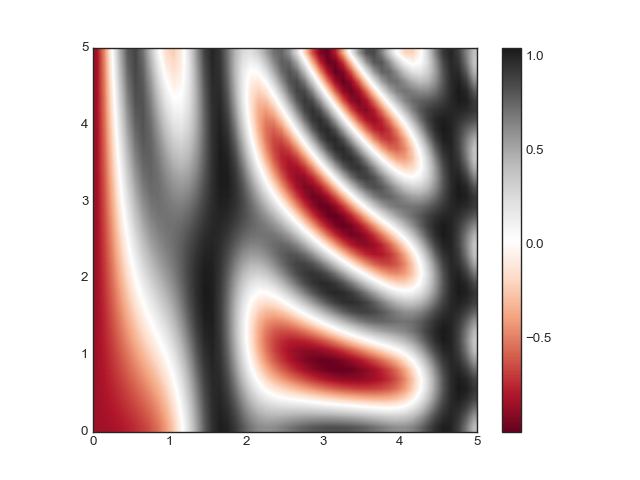

In [78]:
fig = plt.figure()
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
#plt.axis(aspect='image');

Existem algumas armadilhas potenciais com `imshow()`, no entanto:
* `plt.imshow()` não aceita uma grade x e y, então você deve especificar manualmente a extensão [xmin, xmax, ymin, ymax] da imagem no gráfico.
* `plt.imshow()` por padrão segue a definição de matriz de imagem padrão onde a origem está no canto superior esquerdo, não no canto inferior esquerdo como na maioria dos gráficos de contorno. Isso deve ser alterado ao mostrar dados em grade.
* `plt.imshow()` ajustará automaticamente a proporção do eixo para corresponder aos dados de entrada; você pode alterar isso definindo, por exemplo, `plt.axis(aspect='image')` para fazer com que as unidades x e y correspondam.

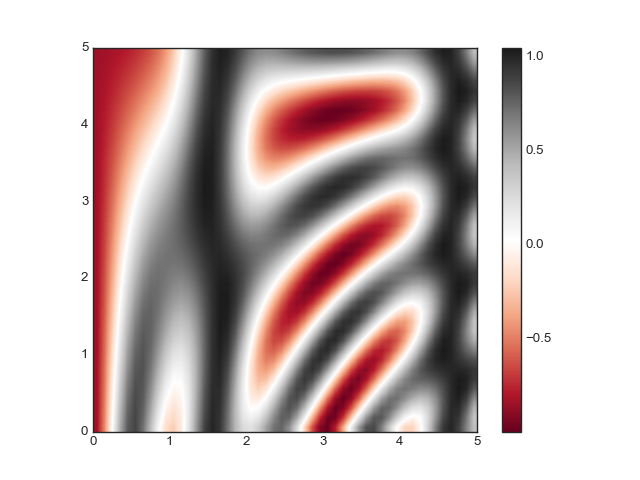

In [80]:
fig = plt.figure()
plt.imshow(Z, extent=[0, 5, 0, 5], cmap='RdGy')
plt.colorbar()
#plt.axis(aspect='image');

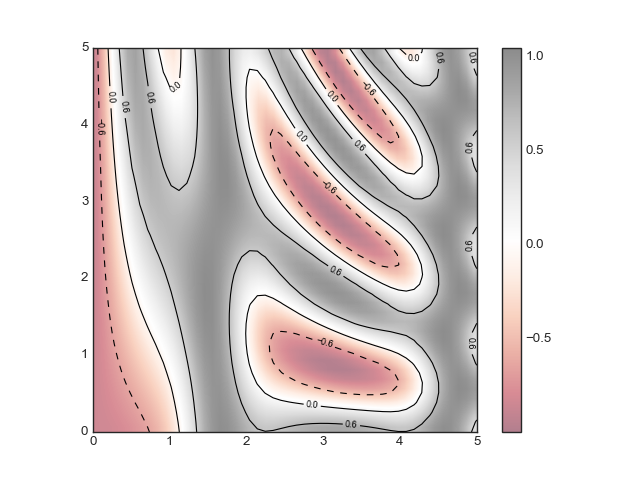

In [85]:
fig = plt.figure()
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

#### Histograms, Binnings, and Density ####

In [82]:
data = np.random.randn(1000)

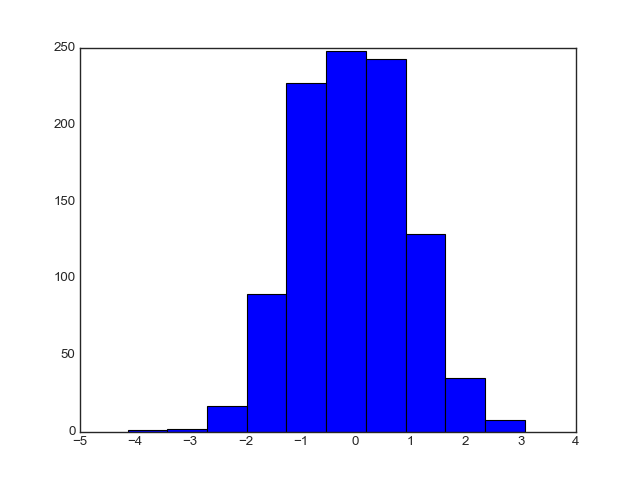

In [86]:
fig = plt.figure()
plt.hist(data);

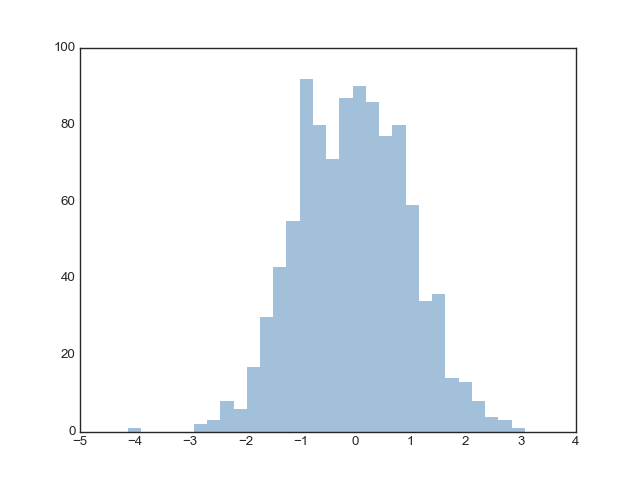

In [87]:
fig = plt.figure()
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

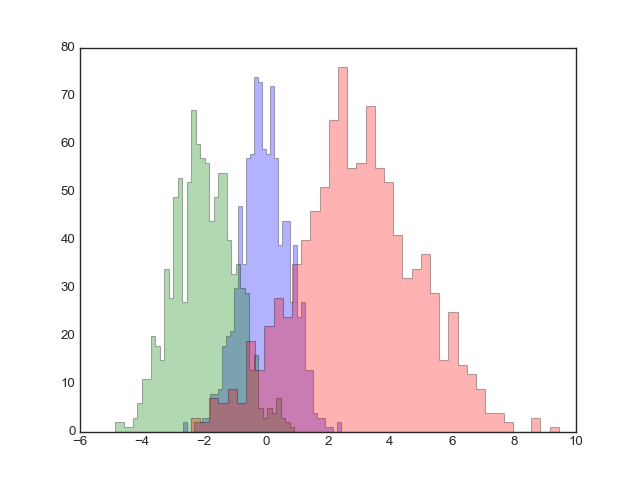

In [89]:
fig = plt.figure()
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

#####  Two-Dimensional Histograms and Binnings ####

In [90]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

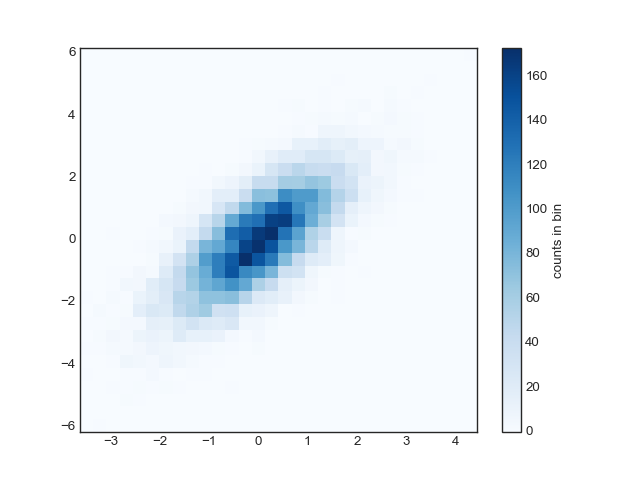

In [91]:
fig = plt.figure()
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

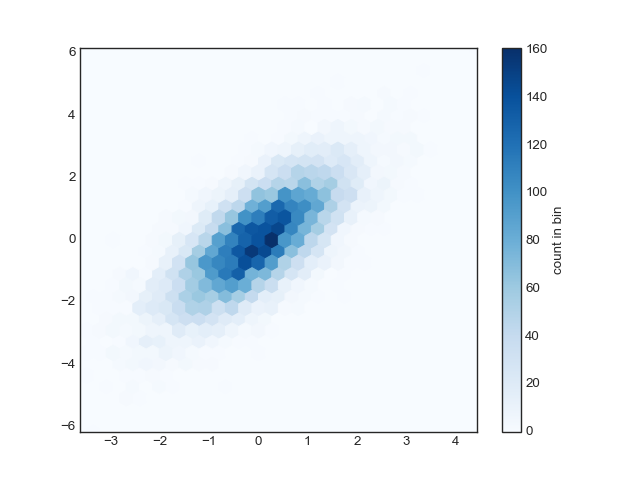

In [92]:
fig = plt.figure()
plt.hexbin(x, y, gridsize=30, cmap='Blues') 
cb = plt.colorbar(label='count in bin')

#### Customizing Plot Legends ####

In [93]:
plt.style.use('classic')

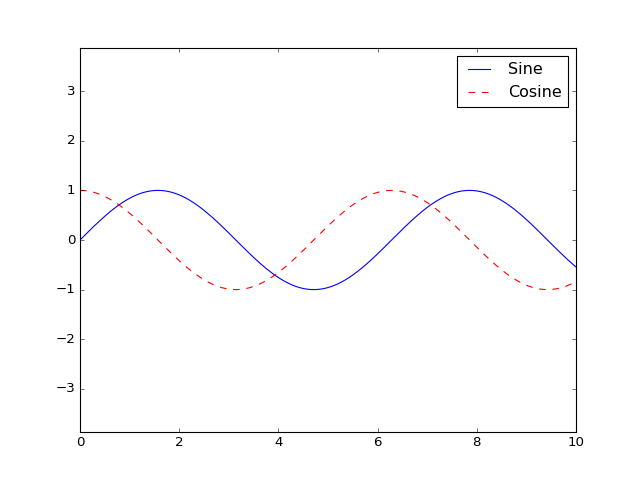

In [94]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

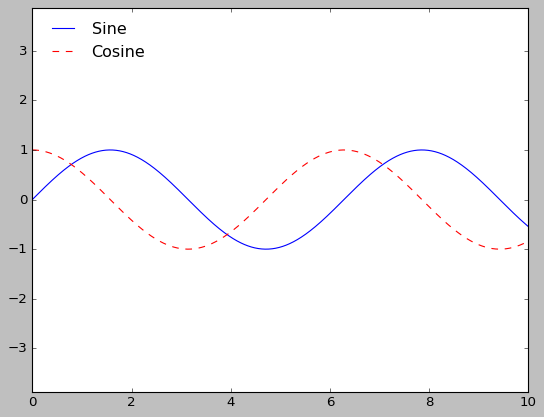

In [95]:
ax.legend(loc='upper left', frameon=False)
fig

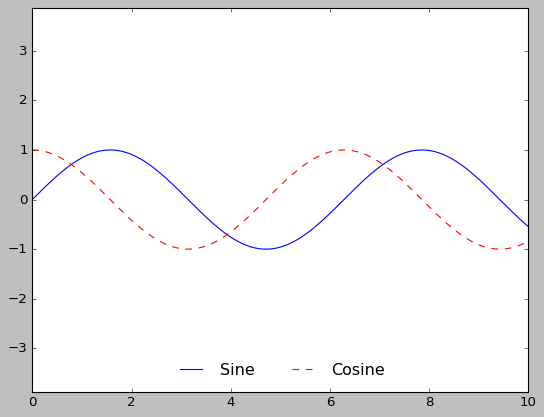

In [96]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

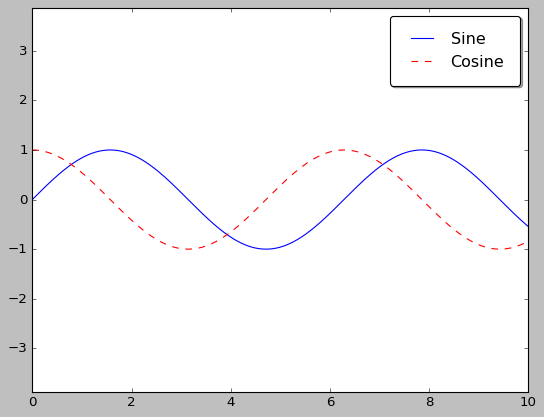

In [97]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

#### Example: Handwritten Digits ####


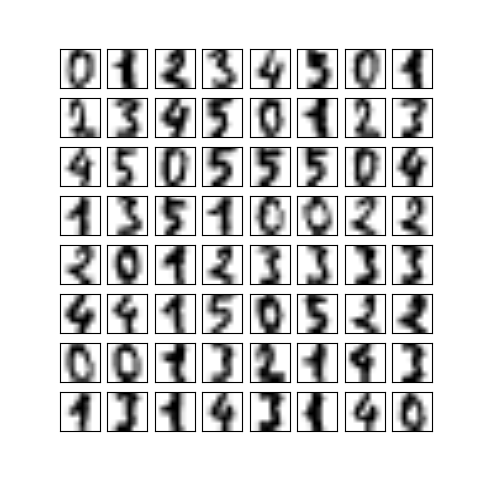

In [98]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [99]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [102]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

#### Multiple Subplots ####

In [101]:
#plt.style.use('seaborn-white')

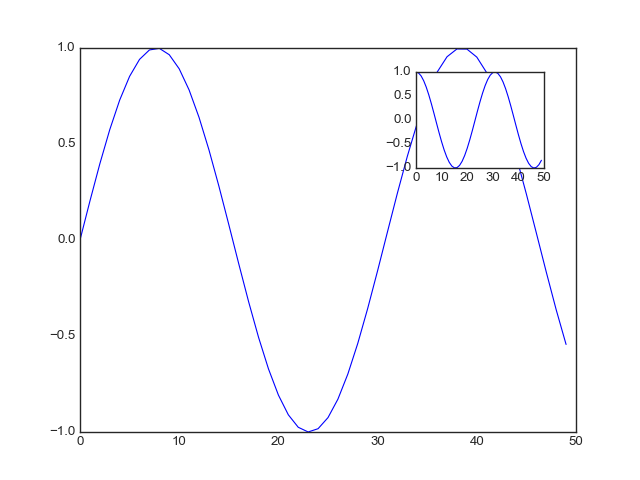

In [104]:
fig = plt.figure()
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

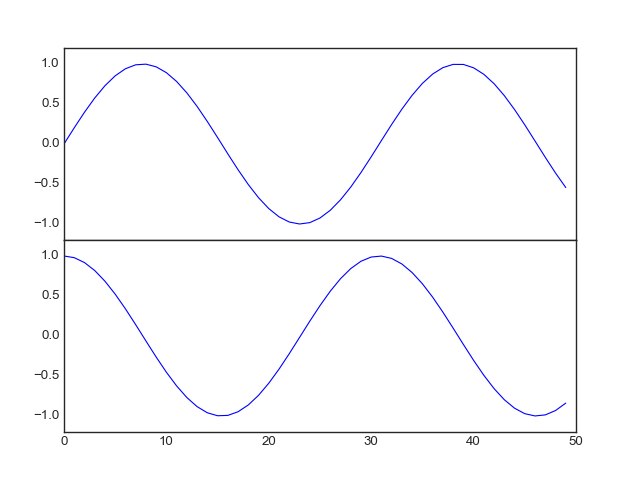

In [107]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

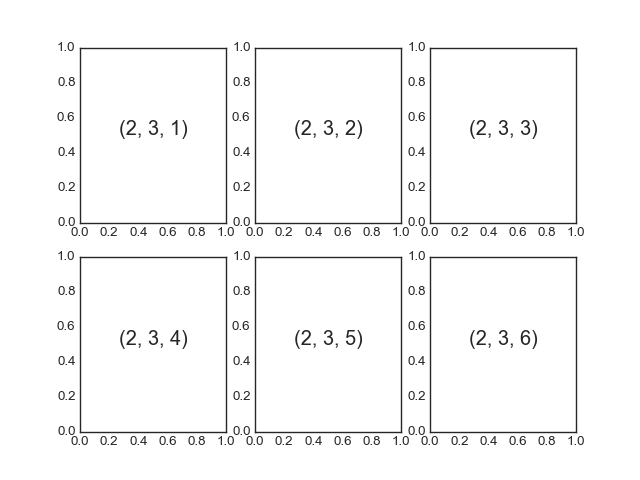

In [108]:
fig = plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

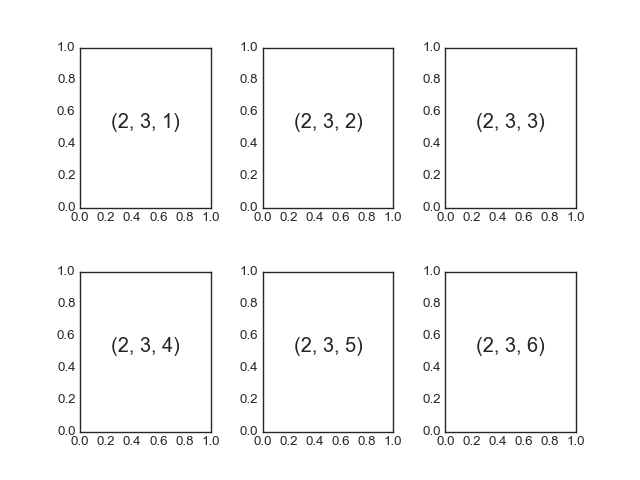

In [109]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) 
    ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

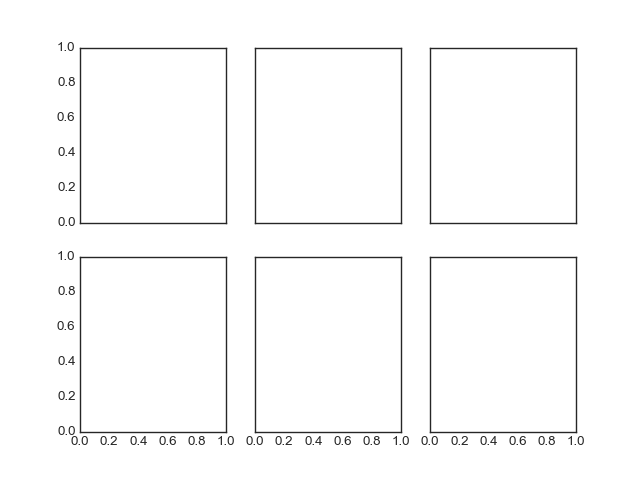

In [110]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

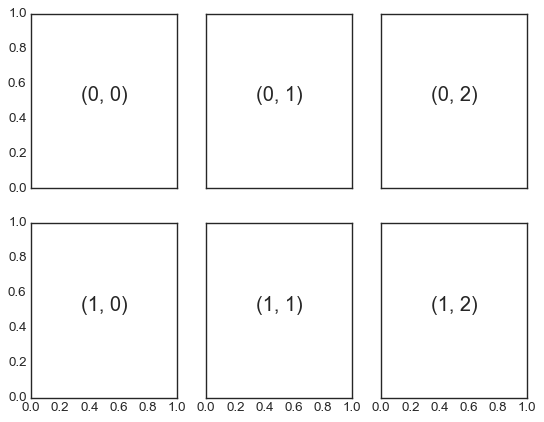

In [111]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

In [112]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

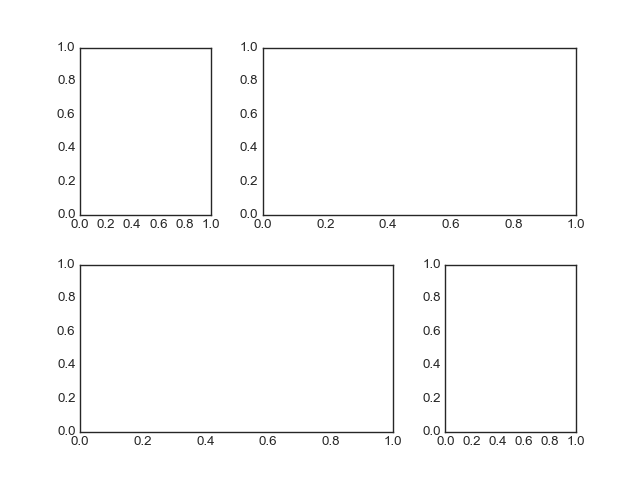

In [113]:
fig = plt.figure()
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

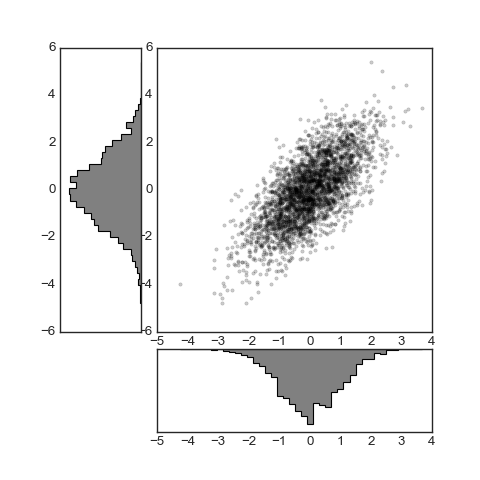

In [114]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()


#### Three-Dimensional Plotting in Matplotlib ####

In [115]:
from mpl_toolkits import mplot3d

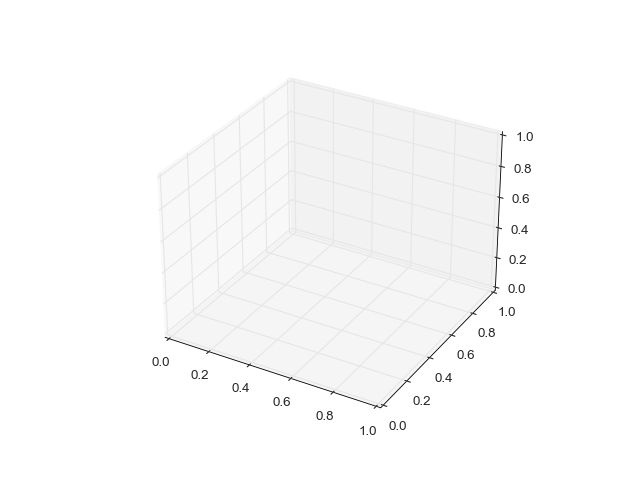

In [116]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#### Three-Dimensional Points and Lines ####

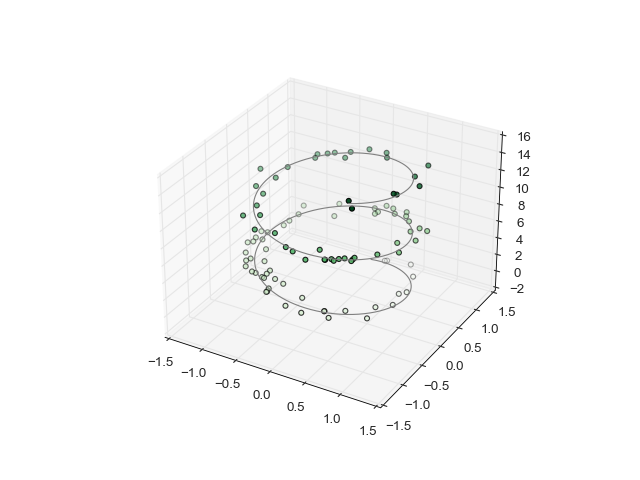

In [117]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

#### Three-Dimensional Contour Plots ####

In [118]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

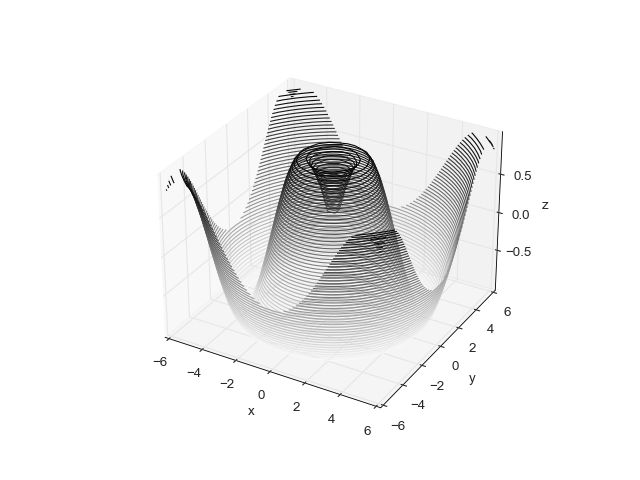

In [119]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

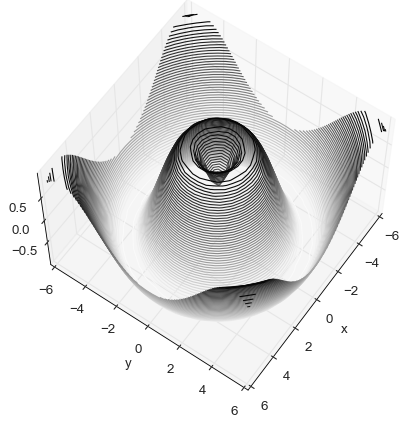

In [120]:
ax.view_init(60, 35)
fig

#### Wireframes and Surface Plots ####

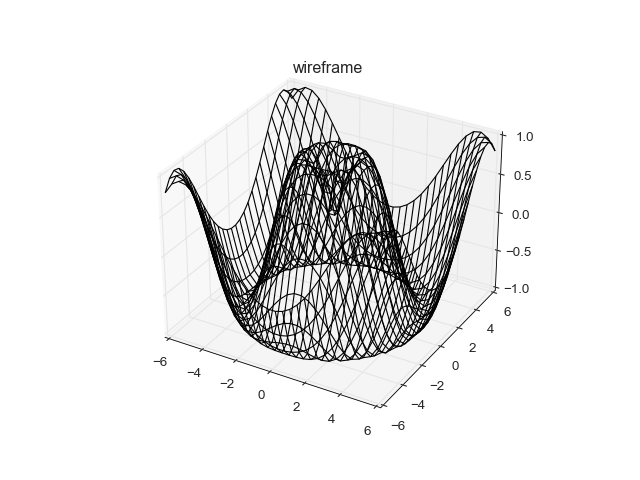

In [121]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');


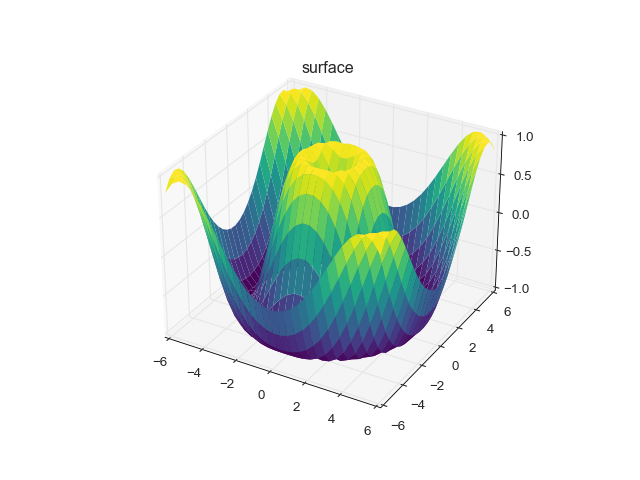

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

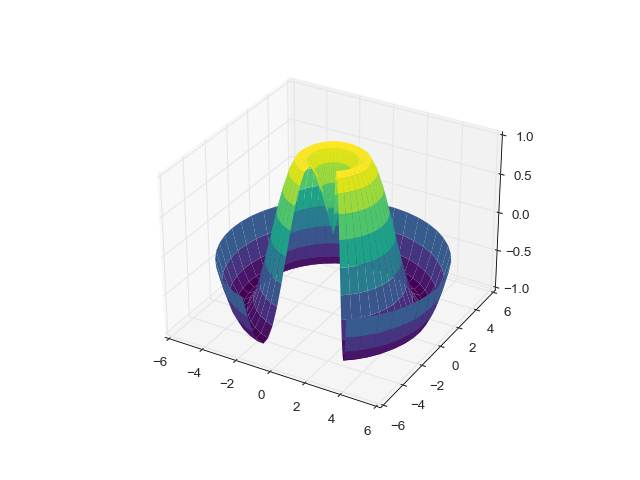

In [123]:
fig = plt.figure()
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

#### Surface Triangulations ####

In [124]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

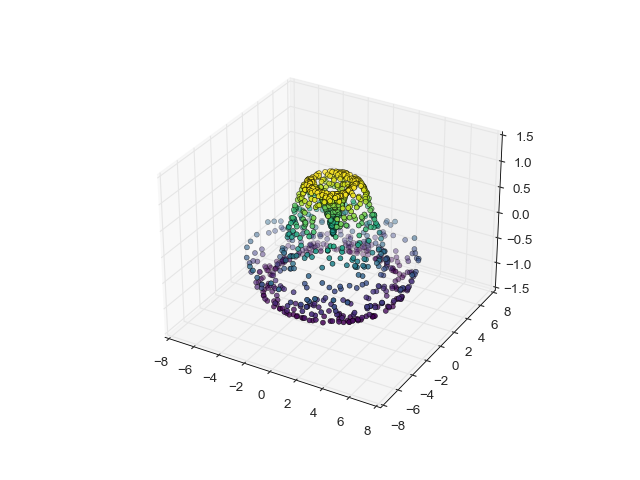

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

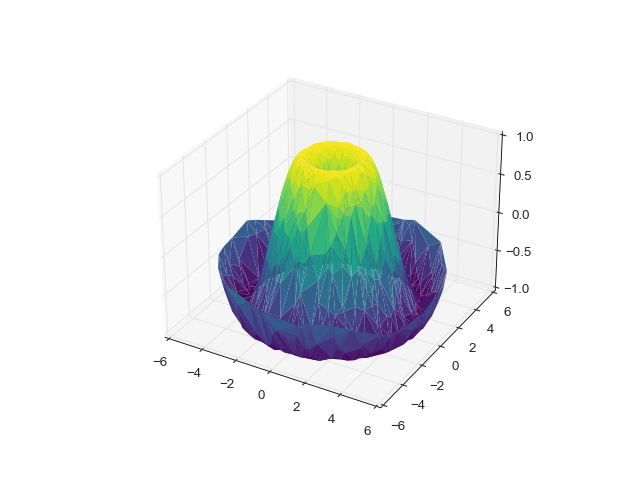

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

## Biblioteca de imagens Python

Python Imaging Library (PIL) é um módulo para leitura, escrita e processamento de arquivos de imagem. Ele suporta a maioria dos formatos de imagem comuns como JPEG, PNG, TIFF, etc. Em uma seção subseqüente, o PIL poderá ser usado para ler e gravar imagens.

## Scikits

Scikits é uma forma abreviada de kits de ferramentas scipy. É um pacote adicional que pode ser usado junto com as ferramentas scipy. Um algoritmo é programado em scikits se:

1. O algoritmo ainda está em desenvolvimento e não está pronto para o horário nobre no scipy.

2. O pacote tem uma licença que não é compatível com scipy.

3. Scipy é um pacote científico de uso geral em Python. Assim, ele é projetado para ser aplicável a uma ampla gama de campos. Se um pacote for considerado especializado para um determinado campo, ele continuará a fazer parte dos scikits.

O Scikits consiste em módulos de vários campos, como ciência ambiental, análise estatística, processamento de imagem, engenharia de micro-ondas, processamento de áudio, problema de valor de contorno, ajuste de curva, computação quântica, etc.

Neste curso, vamos nos concentrar apenas nas rotinas de processamento de imagens do scikits denominadas scikit-image. A rotina scikit-image contém algoritmos para entrada/saída, morfologia, detecção e análise de objetos, etc.

## Módulo Python OpenCV

A Open Source Computer Vision Library (OpenCV) é uma biblioteca de software de processamento de imagens, visão computacional e aprendizado de máquina. Possui mais de 2000 algoritmos para processamento de dados de imagem. Possui uma grande base de usuários e é amplamente utilizado em instituições acadêmicas, organizações comerciais e agências governamentais. Ele fornece suporte para linguagens de programação comuns, como C, C++, Python etc.